In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Making the Dataset

Design/create a small dataset that you can use to address the questions above. Paste it here. Keep it small with 3 – 4 columns and 25 – 30 rows. You decide the column/variable names and what the data would look like. It can be anything you want that also makes sense with respect to the question. You create the dataset you need.

In [7]:
import random
random.seed(1111)

num_purchases_last_month = np.random.randint(1,30, size = 27)
net_purchase_amount_last_month = [35,57,60,260,20,500,440,750,250,37,500,29,80,75,250,55,68,15,19,202,67,75,20,64,73,88,110]
most_visited_cat = ['medication', 'tent', 'cutlery', 'computer', 'shirt', 'computer', 'playstation', 'computer', 'computer', 'cutlery', 'playstation',
                    'medication','tent', 'cutlery', 'computer', 'shirt','cutlery', 'shirt', 'shirt', 'medication', 'tent', 'cutlery', 'shirt', 'tent', 'medication', 'tent', 'cutlery']
prob_purchase = np.random.random(size = 27)
base_df = pd.DataFrame(columns = ['num_visits', 'net_purchase_amnt', 'top_item_purchased', "probability_purchase"], data = list(zip(num_purchases_last_month, net_purchase_amount_last_month,most_visited_cat, prob_purchase)))
base_df


,num_visits,net_purchase_amnt,top_item_purchased,probability_purchase
0,7,35,medication,0.468117
1,28,57,tent,0.282289
2,20,60,cutlery,0.942456
3,1,260,computer,0.173753
4,6,20,shirt,0.031480
5,10,500,computer,0.484588
6,16,440,playstation,0.197140
7,10,750,computer,0.095472
8,14,250,computer,0.667459
9,16,37,cutlery,0.051896


### Recommend a credit card

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [38]:
encoder = LabelEncoder()
encoded_df = base_df.copy()
encoded_df['top_item_purchased'] = encoder.fit_transform(encoded_df['top_item_purchased'])

In [39]:
scaler = StandardScaler()
scaled = scaler.fit_transform(encoded_df)

In [40]:
KMean2 = KMeans(n_clusters=2)
KMean2.fit(scaled)
encoded_df['suggest_credit_card'] = KMean2.labels_
encoded_df

,num_visits,net_purchase_amnt,top_item_purchased,probability_purchase,suggest_credit_card
0,7,35,2,0.468117,0
1,28,57,5,0.282289,1
2,20,60,1,0.942456,1
3,1,260,0,0.173753,0
4,6,20,4,0.031480,0
5,10,500,0,0.484588,0
6,16,440,3,0.197140,0
7,10,750,0,0.095472,0
8,14,250,0,0.667459,0
9,16,37,1,0.051896,0


In [82]:
base_df['suggest_credit_card'] = encoded_df['suggest_credit_card']

Text(0.5, 1.0, 'Percentage of Users Eligible for Credit Cards')

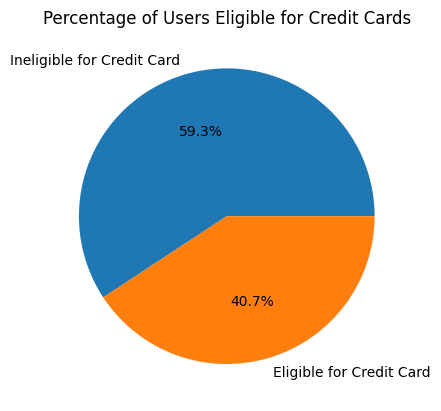

In [50]:
plt.pie(
    x = encoded_df['suggest_credit_card'].value_counts(),
    labels = ['Ineligible for Credit Card', 'Eligible for Credit Card'],
    autopct='%1.1f%%'
)
plt.title("Percentage of Users Eligible for Credit Cards")

Text(0.5, 1.0, 'Items Purchased')

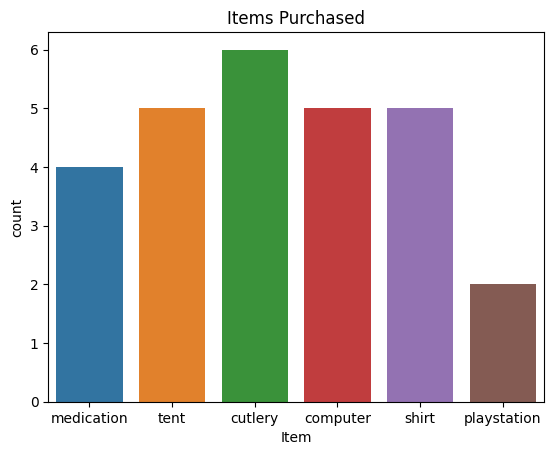

In [55]:
sns.countplot(
     x = base_df['top_item_purchased']
)
plt.xlabel("Item")
plt.title("Items Purchased")


Text(0.5, 0, 'Number of Site Visits')

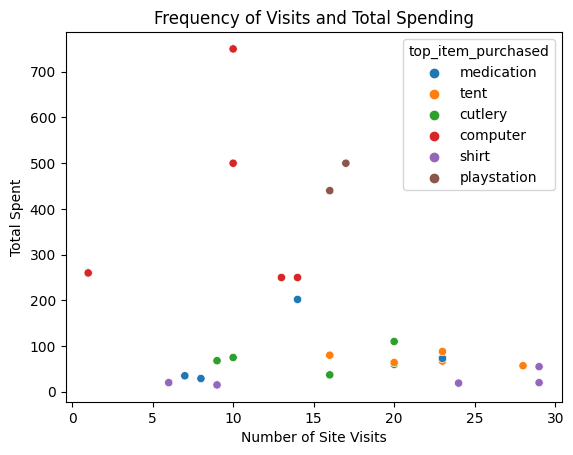

In [58]:
sns.scatterplot(
    x = base_df['num_visits'],
    y = base_df['net_purchase_amnt'],
    hue = base_df['top_item_purchased']
)
plt.title("Frequency of Visits and Total Spending")
plt.ylabel("Total Spent")
plt.xlabel("Number of Site Visits")

Text(0.5, 0, 'Number of Site Visits')

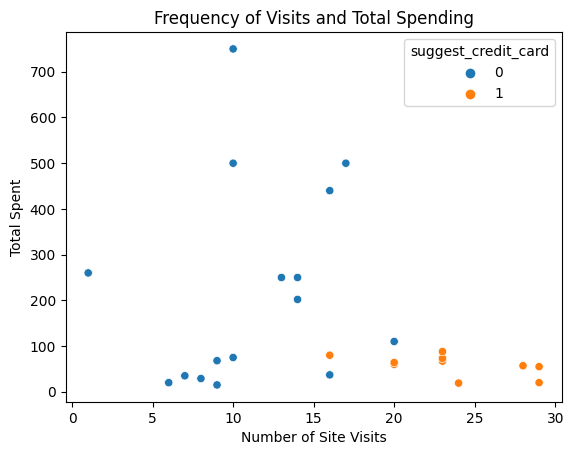

In [59]:
sns.scatterplot(
    x = encoded_df['num_visits'],
    y = encoded_df['net_purchase_amnt'],
    hue = encoded_df['suggest_credit_card']
)
plt.title("Frequency of Visits and Total Spending")
plt.ylabel("Total Spent")
plt.xlabel("Number of Site Visits")

In [62]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

[Text(0.5, 0.9166666666666666, 'net_purchase_amnt <= 226.0\ngini = 0.82\nsamples = 27\nvalue = [5, 6, 4, 2, 5, 5]\nclass = tent'),
 Text(0.25, 0.75, 'net_purchase_amnt <= 24.5\ngini = 0.745\nsamples = 20\nvalue = [0, 6, 4, 0, 5, 5]\nclass = tent'),
 Text(0.125, 0.5833333333333334, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 0, 4, 0]\nclass = shirt'),
 Text(0.375, 0.5833333333333334, 'suggest_credit_card <= 0.5\ngini = 0.695\nsamples = 16\nvalue = [0, 6, 4, 0, 1, 5]\nclass = tent'),
 Text(0.25, 0.4166666666666667, 'probability_purchase <= 0.299\ngini = 0.49\nsamples = 7\nvalue = [0, 4, 3, 0, 0, 0]\nclass = tent'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0]\nclass = tent'),
 Text(0.375, 0.25, 'probability_purchase <= 0.552\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3, 0, 0, 0]\nclass = cutlery'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0]\nclass = cutlery'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nv

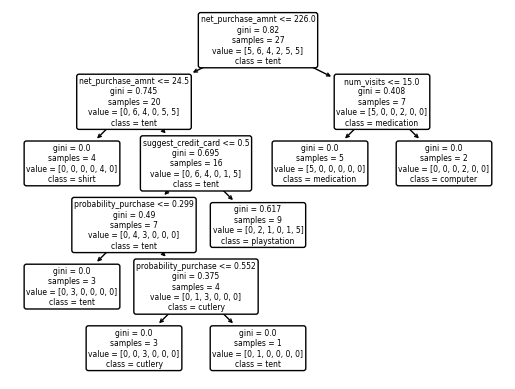

In [87]:
x_training = base_df.drop(columns = ['top_item_purchased'])
y_train = base_df['top_item_purchased']
decision_tree=DecisionTreeClassifier(criterion='gini',
                            splitter='best', 
                            max_depth=5, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=1111, 
                            min_impurity_decrease=0.05, 
)
decision_tree.fit(x_training, y_train)
tree.plot_tree(decision_tree,
               feature_names = x_training.columns,
               class_names = y_train.unique(),
               rounded=True)

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

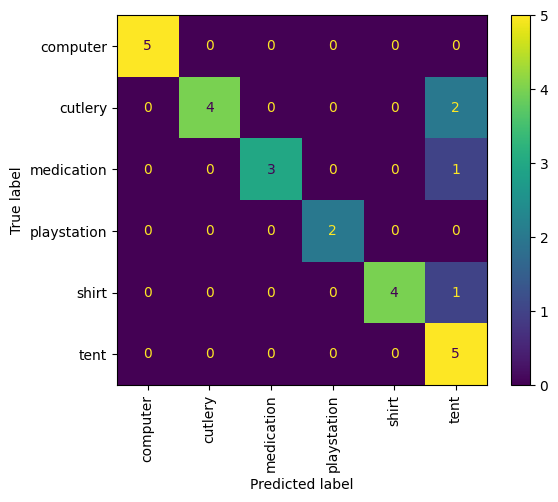

In [89]:
ConfusionMatrixDisplay.from_estimator(decision_tree, x_training, y_train, xticks_rotation='vertical')

In [90]:
base_df['recommended_product'] = decision_tree.predict(x_training)

recommendation_map = {'playstation' : 'controller',
'computer' : 'mouse',
'shirt' : 'pant',
'cutlery' : 'spatula',
'tent' : 'hiking poles',
'medication' : 'vitamins'}

base_df['recommended_product'] = base_df['recommended_product'].map(recommendation_map)

base_df

,num_visits,net_purchase_amnt,top_item_purchased,probability_purchase,suggest_credit_card,recommended_product
0,7,35,medication,0.468117,0,vitamins
1,28,57,tent,0.282289,1,hiking poles
2,20,60,cutlery,0.942456,1,hiking poles
3,1,260,computer,0.173753,0,mouse
4,6,20,shirt,0.031480,0,pant
5,10,500,computer,0.484588,0,mouse
6,16,440,playstation,0.197140,0,controller
7,10,750,computer,0.095472,0,mouse
8,14,250,computer,0.667459,0,mouse
9,16,37,cutlery,0.051896,0,spatula


Text(0, 0.5, 'Recommended Product')

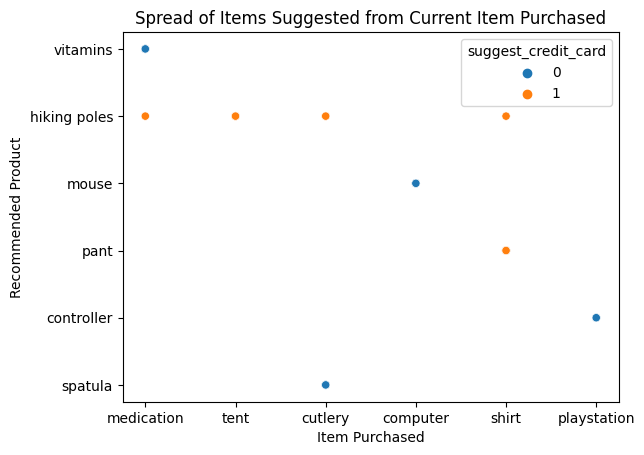

In [94]:
sns.scatterplot(
    y = base_df['recommended_product'],
    x = base_df['top_item_purchased'],
    hue = base_df['suggest_credit_card']
    )
plt.title("Spread of Items Suggested from Current Item Purchased")
plt.xlabel("Item Purchased")
plt.ylabel("Recommended Product")